***LGM DATA SCIENCE INTERNSHIP - TASK-2(BEGINNER LEVEL) By -Y Udit Kumar***

**Stock Market Prediction And Forecasting Using Stacked LSTM**

# **Important** **libraries** 

In [60]:
### Data Collection
import pandas_datareader as pdr
key="a7aef834458d25d3e5fb5b276c1bd927416ca689"

In [70]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [65]:

df.to_csv('NSE-Tata-Global-Beverages-Limited.csv')

import pandas as pd

df=pd.read_csv('NSE-Tata-Global-Beverages-Limited.csv')
df.head()


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-08-22 00:00:00+00:00,108.51,109.10,107.85,108.860,25820230,25.436673,25.574980,25.281958,25.518720,103280920,0.0,1.0
1,AAPL,2016-08-23 00:00:00+00:00,108.85,109.32,108.53,108.590,21257669,25.516376,25.626552,25.441362,25.455427,85030676,0.0,1.0
2,AAPL,2016-08-24 00:00:00+00:00,108.03,108.75,107.68,108.565,23675081,25.324153,25.492934,25.242107,25.449566,94700324,0.0,1.0
3,AAPL,2016-08-25 00:00:00+00:00,107.57,107.88,106.68,107.390,25086248,25.216321,25.288990,25.007689,25.174126,100344992,0.0,1.0
4,AAPL,2016-08-26 00:00:00+00:00,106.94,107.95,106.31,107.410,27766291,25.068638,25.305400,24.920954,25.178814,111065164,0.0,1.0


In [71]:
df.tail()


close      high  ...  divCash  splitFactor
symbol date                                         ...                      
AAPL   2021-08-13 00:00:00+00:00  149.10  149.4444  ...      0.0          1.0
       2021-08-16 00:00:00+00:00  151.12  151.1900  ...      0.0          1.0
       2021-08-17 00:00:00+00:00  150.19  151.6800  ...      0.0          1.0
       2021-08-18 00:00:00+00:00  146.36  150.7200  ...      0.0          1.0
       2021-08-19 00:00:00+00:00  146.70  148.0000  ...      0.0          1.0

[5 rows x 12 columns]

In [72]:
df1=df.reset_index()['close']
df1

0       108.51
1       108.85
2       108.03
3       107.57
4       106.94
         ...  
1253    149.10
1254    151.12
1255    150.19
1256    146.36
1257    146.70
Name: close, Length: 1258, dtype: float64

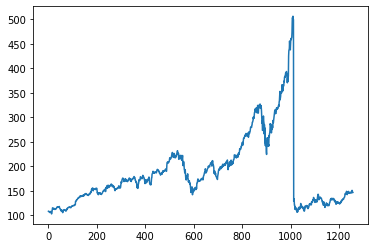

In [73]:
df1=df.reset_index()['close']
plt.plot(df1)

In [74]:
import numpy as np
df1

0       108.51
1       108.85
2       108.03
3       107.57
4       106.94
         ...  
1253    149.10
1254    151.12
1255    150.19
1256    146.36
1257    146.70
Name: close, Length: 1258, dtype: float64

In [75]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)


[[0.0133512 ]
 [0.01419496]
 [0.01216002]
 ...
 [0.11678579]
 [0.10728112]
 [0.10812488]]


In [76]:
df1

array([[0.0133512 ],
       [0.01419496],
       [0.01216002],
       ...,
       [0.11678579],
       [0.10728112],
       [0.10812488]])

In [77]:
df1.shape

(1258, 1)

In [79]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size


(817, 441)

In [80]:
len(train_data), len(test_data)


(817, 441)

In [81]:
test_data


array([[0.40490371],
       [0.39721064],
       [0.39428231],
       [0.39371153],
       [0.40510224],
       [0.39994044],
       [0.40875025],
       [0.40728608],
       [0.39961783],
       [0.38792932],
       [0.39361227],
       [0.40314175],
       [0.41587254],
       [0.40646714],
       [0.4103385 ],
       [0.41602144],
       [0.41773377],
       [0.42689101],
       [0.43857951],
       [0.43994441],
       [0.43828172],
       [0.43897657],
       [0.43753722],
       [0.44885348],
       [0.44952353],
       [0.46351995],
       [0.46324697],
       [0.46751539],
       [0.47280127],
       [0.48942823],
       [0.48218185],
       [0.48806333],
       [0.48456422],
       [0.49647608],
       [0.51245781],
       [0.51419496],
       [0.5306482 ],
       [0.5200268 ],
       [0.51670141],
       [0.52637979],
       [0.5350407 ],
       [0.52968037],
       [0.53248461],
       [0.53628152],
       [0.53399841],
       [0.5107703 ],
       [0.5324598 ],
       [0.548

In [82]:
train_data


array([[0.0133512 ],
       [0.01419496],
       [0.01216002],
       [0.01101846],
       [0.00945503],
       [0.00915724],
       [0.0071223 ],
       [0.00737046],
       [0.00893389],
       [0.01141553],
       [0.01134108],
       [0.01297896],
       [0.00593111],
       [0.        ],
       [0.00573258],
       [0.01196149],
       [0.02144133],
       [0.03087155],
       [0.02925849],
       [0.0259331 ],
       [0.02590828],
       [0.02585865],
       [0.028514  ],
       [0.02377407],
       [0.02419595],
       [0.02471709],
       [0.0268513 ],
       [0.0224588 ],
       [0.02461783],
       [0.02330256],
       [0.02449375],
       [0.02461783],
       [0.0267024 ],
       [0.02712428],
       [0.03206274],
       [0.03268314],
       [0.03526405],
       [0.03437066],
       [0.03598372],
       [0.03578519],
       [0.03558666],
       [0.03471809],
       [0.03456919],
       [0.03342764],
       [0.03603335],
       [0.03752233],
       [0.03092118],
       [0.028

In [83]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)
 # reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

X_train
y_train

array([0.03948283, 0.0418652 , 0.04184038, 0.04131924, 0.0418652 ,
       0.04206373, 0.04179075, 0.04653067, 0.04667957, 0.04670439,
       0.04591026, 0.04521541, 0.06357951, 0.06303355, 0.06439845,
       0.06740123, 0.07047846, 0.07174409, 0.07268712, 0.07194262,
       0.07484614, 0.07913937, 0.08035537, 0.0799459 , 0.08087651,
       0.08330852, 0.08432599, 0.08288664, 0.08320925, 0.08387929,
       0.08402819, 0.09097677, 0.08891701, 0.09095196, 0.08986004,
       0.09030673, 0.08901628, 0.08822216, 0.08936371, 0.08951261,
       0.08899146, 0.09263947, 0.09321024, 0.0914731 , 0.0951211 ,
       0.09110085, 0.09502184, 0.09378102, 0.09308616, 0.09368176,
       0.10092813, 0.10172226, 0.10125074, 0.1005807 , 0.10067997,
       0.10333532, 0.10147409, 0.1005807 , 0.09978658, 0.0993647 ,
       0.09554298, 0.09596486, 0.09410363, 0.09603931, 0.09447588,
       0.09318543, 0.09755311, 0.09713123, 0.10053107, 0.10273973,
       0.10063034, 0.10090332, 0.10055589, 0.10782708, 0.11013

In [84]:
print(X_train.shape), print(y_train.shape)


(716, 100)
(716,)


(None, None)

In [85]:
print(X_test.shape), print(ytest.shape)


(340, 100)
(340,)


(None, None)

In [86]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
12/12 [==============================] - 8s 289ms/step - loss: 0.0109 - val_loss: 0.0386
Epoch 2/100
12/12 [==============================] - 2s 189ms/step - loss: 0.0026 - val_loss: 0.0264
Epoch 3/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0013 - val_loss: 0.0227
Epoch 4/100
12/12 [==============================] - 2s 189ms/step - loss: 8.6453e-04 - val_loss: 0.0226
Epoch 5/100
12/12 [==============================] - 2s 188ms/step - loss: 5.4904e-04 - val_loss: 0.0249
Epoch 6/100
12/12 [==============================] - 2s 188ms/step - loss: 5.1571e-04 - val_loss: 0.0241
Epoch 7/100
12/12 [==============================] - 2s 196ms/step - loss: 4.6133e-04 - val_loss: 0.0225
Epoch 8/100
12/12 [==============================] - 2s 188ms/step - loss: 4.7802e-04 - val_loss: 0.0220
Epoch 9/100
12/12 [==============================] - 2s 189ms/step - loss: 4.4450e-04 - val_loss: 0.0230
Epoch 10/100
12/12 [==============================] - 2s 188ms/step

In [89]:
import tensorflow as tf
tf.__version__


'2.6.0'

In [90]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


184.34028865196893

In [91]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

235.31057425649178

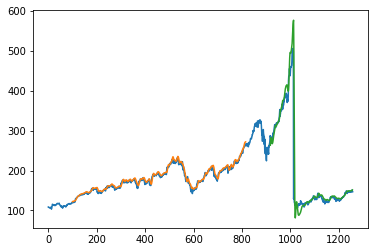

In [92]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [93]:
len(test_data)


441

In [94]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [95]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [96]:
temp_input


[0.04161703394877908,
 0.047200714711137626,
 0.04931010522136198,
 0.05650684931506855,
 0.05727615644232681,
 0.06147012110383171,
 0.06757494540401038,
 0.0741140559857058,
 0.06975878499106619,
 0.07767520349414342,
 0.07171927734762762,
 0.07784891800675009,
 0.07700516180266037,
 0.07869267421083981,
 0.07439944411355975,
 0.07536728211236854,
 0.07149593011713323,
 0.07740222354576137,
 0.07839487790351402,
 0.0775759380583681,
 0.07556581298391907,
 0.07531764939448088,
 0.07030474488783012,
 0.0729849116537622,
 0.06134603930911259,
 0.061966448282707975,
 0.06603633114949381,
 0.06720270001985312,
 0.05886440341473104,
 0.056531665674012355,
 0.048739328965654194,
 0.05419892793329367,
 0.06035338495136,
 0.05742505459598973,
 0.05390113162596788,
 0.05350406988286682,
 0.06000595592614655,
 0.055340480444709184,
 0.059484812388326425,
 0.0589884852094501,
 0.05886440341473104,
 0.054968235060551984,
 0.053305539011316294,
 0.05248659916617038,
 0.054422275163788,
 0.05065018

In [97]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.12076686]
101
1 day input [0.04720071 0.04931011 0.05650685 0.05727616 0.06147012 0.06757495
 0.07411406 0.06975878 0.0776752  0.07171928 0.07784892 0.07700516
 0.07869267 0.07439944 0.07536728 0.07149593 0.07740222 0.07839488
 0.07757594 0.07556581 0.07531765 0.07030474 0.07298491 0.06134604
 0.06196645 0.06603633 0.0672027  0.0588644  0.05653167 0.04873933
 0.05419893 0.06035338 0.05742505 0.05390113 0.05350407 0.06000596
 0.05534048 0.05948481 0.05898849 0.0588644  0.05496824 0.05330554
 0.0524866  0.05442228 0.05065019 0.05648203 0.05650685 0.05859142
 0.05955926 0.05702799 0.06010522 0.06787274 0.06578817 0.0670538
 0.07112368 0.06782311 0.07238932 0.07655847 0.07586361 0.07514393
 0.07439944 0.07854378 0.08239031 0.08395374 0.08472305 0.09139865
 0.09651082 0.10283899 0.09953842 0.10417907 0.10266528 0.10549434
 0.11420488 0.11254219 0.10735557 0.09757792 0.10675998 0.10489875
 0.10837304 0.11274072 0.11380782 0.10829859 0.10385646 0.10549434
 0.1060403  0.10519655 0.10976276 

In [98]:
day_new=np.arange(1,101) # because the data set we considered is 100 
day_pred=np.arange(101,131)# here it is 131 because we have extra 30 days for the prediction

In [99]:
import matplotlib.pyplot as plt
len(df1)


1258

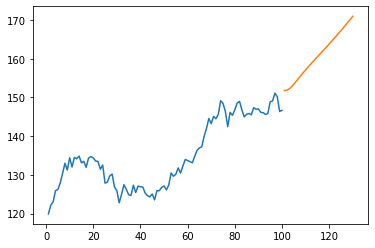

In [100]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))# 1158, because total length is 1125 and including previous data
plt.plot(day_pred,scaler.inverse_transform(lst_output))

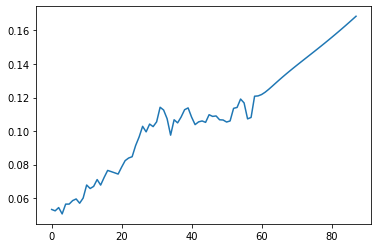

In [101]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

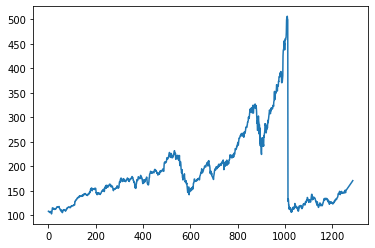

In [102]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)
